# Упражнение 1
Посмотреть с помощью chap01.ipynb примеры и пояснения.

# Упражнение 1.2
Скачайте с сайта https://freesound.org/ образец звука, включающий музыку, речь или иные звуки, имеющие четко выраженную высоту. Выделите примерно полусекундный сегмент, в котором высота постоянна. Вычислите и распечатайте спектр выбранного сегмента. Как связанны тембр звука и гармоническая структура, видимая в спепктре?

Используйте high_pass, low_pass и band_stop для фильтрации тех или иных гармоник. Затем преобразуйте спектры обратно в сигнал и прослушайте его. Как звук соотносится с изменениями, сделанными в спектре?

Импорт библиотек и файлов:

In [ ]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

if not os.path.exists('sound_for_lab1.wav'):
    !wget https://github.com/SmurZik/Telecom/raw/main/sound_for_lab1.wav

Создадим объект wave из скачанного звука, создадим сам звук для прослушивания:

In [ ]:
from thinkdsp import read_wave

wave = read_wave('sound_for_lab1.wav')
wave.normalize()
wave.make_audio()

Построим график сегмента нашего звука:

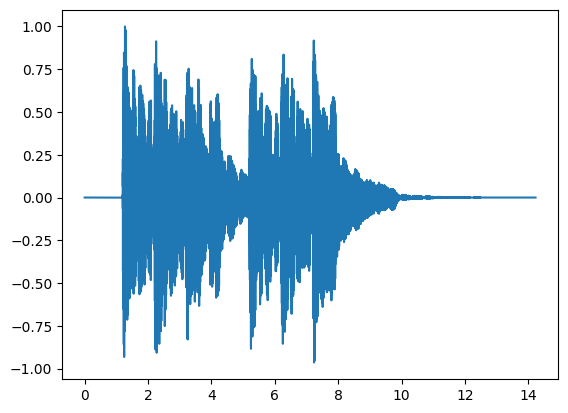

In [ ]:
wave.plot()

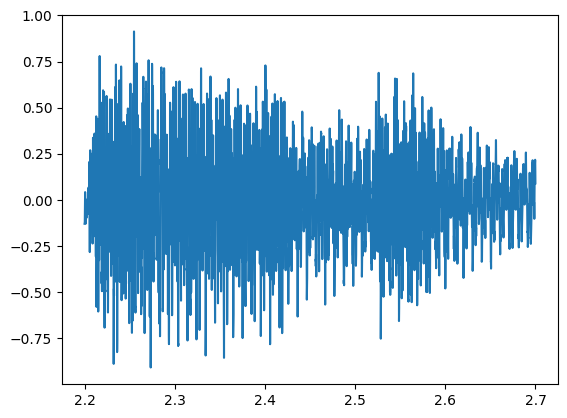

In [ ]:
segment = wave.segment(2.2, 0.5)
segment.plot()
segment.make_audio()

Вычислим и выведем спектр выделенного сегмента:

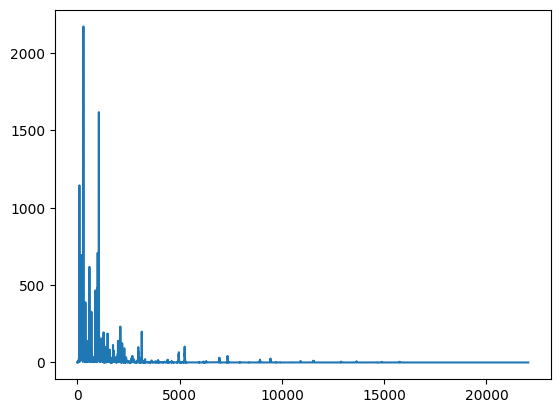

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot()

Исходя из спектра, можно сделать вывод, что звук локализован примерно в первых 4 кГц. Выведем спектр этого диапазона:

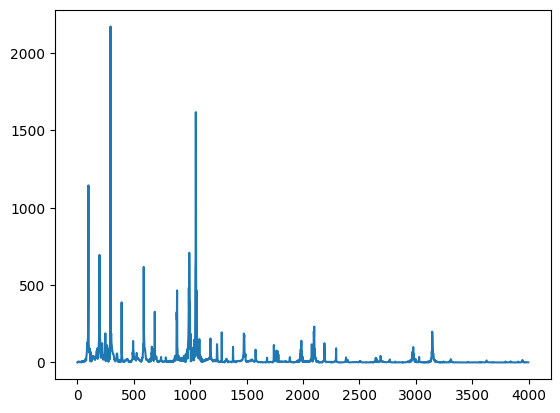

In [ ]:
spectrum.plot(high = 4000)

Приблизим диаграмму до 2 кГц:

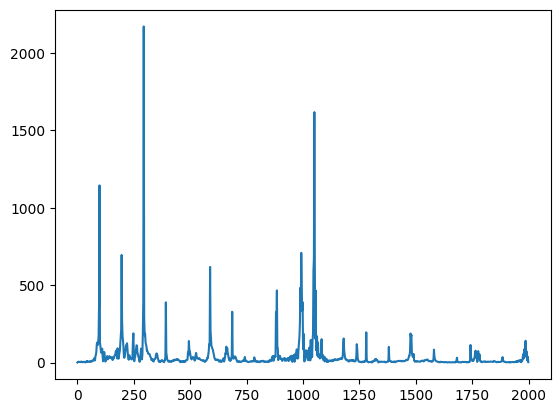

In [ ]:
spectrum.plot(2000)

Выделим доминирующую частоту:

In [ ]:
spectrum.peaks()[:5]

[(2171.7166259585697, 294.0),
 (1617.8905094522243, 1050.0),
 (1144.7265089077844, 98.0),
 (708.5805264734829, 992.0),
 (694.9169058358117, 196.0)]

Видно, что доминирующая частота - 294 Гц (первая в списке).

Воспользуемся low_pass, тем самым отфильтруем всё, что выше 2 кГц:

In [ ]:
spectrum.low_pass(2000)
filtered = spectrum.make_wave()

Сравним исходный звук (первый) и получившийся отфильтрованный (второй):

In [ ]:
segment.make_audio()

In [ ]:
filtered.make_audio()

Видно, что звук стал более полым и глухим. Это следствие того, что с обрезанием частот изменилась форма сигнала и его тембр.

Теперь воспользуемся high_pass и band_stop для исходного выделенного сегмента. Посмотрим на получившуюся диаграмму и послушаем, какой звук получился после одновременной фильтрации с помощью фильтра высоких частот (первый метод) и полосно-заграждающего фильтра (второй метод).

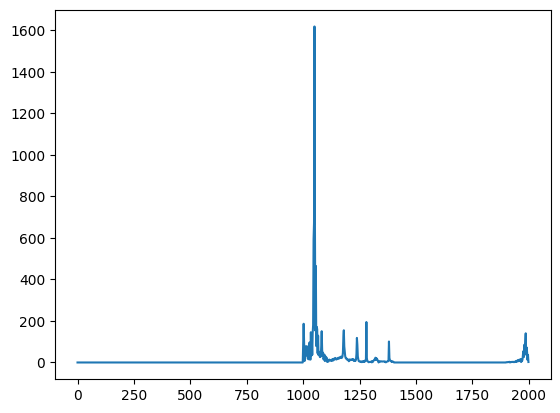

In [ ]:
edited = segment.make_spectrum()
edited.high_pass(1000)
edited.band_stop(1400,1900)
edited.plot(2000)
edited.make_wave().make_audio()

Можно услышать, что звук стал более высоким, звонким, как будто бы даже электронным. Ну это закономерно, так как мы обрезали большую часть частот и оставили основные.

# Упражнение 1.3
Создайте сложный сигнал из объектов SinSignal и CosSignal, суммируя их. Обработайте сигнал для получения wave и прослушайте его. Вычислите Spectrum и распечатайте. Что произойдет при добавлении частот, не кратных основным?

Для начала соединим 4 ноты Ми, Фа, Соль и Ля и отобразим полученный звук

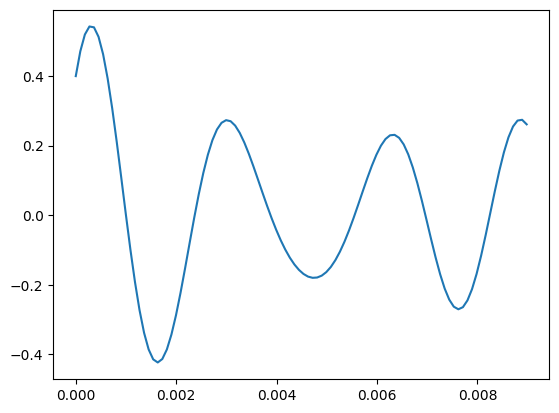

In [ ]:
from thinkdsp import SinSignal, CosSignal

sin_MI = SinSignal(freq=330, amp=0.2)
cos_FA = CosSignal(freq=348, amp=0.2)
sin_SOL = SinSignal(freq=392, amp=0.2)
cos_LA = CosSignal(freq=440, amp=0.2)

my_signal = sin_MI + cos_FA + sin_SOL + cos_LA
my_signal_wave = my_signal.make_wave(duration=1)
my_signal.plot()
my_signal_wave.make_audio()

Вычислим и распечатаем Спектр:

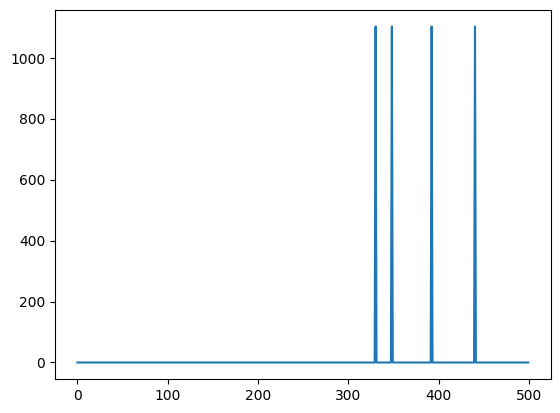

In [ ]:
spectrum = my_signal_wave.make_spectrum()
spectrum.plot(high = 500)

Попробуем добавить в аккорд ноту, не входящую в него, которую можно считать некратной остальным частотам аккорда.
Посмотрим и послушаем, что получилось:

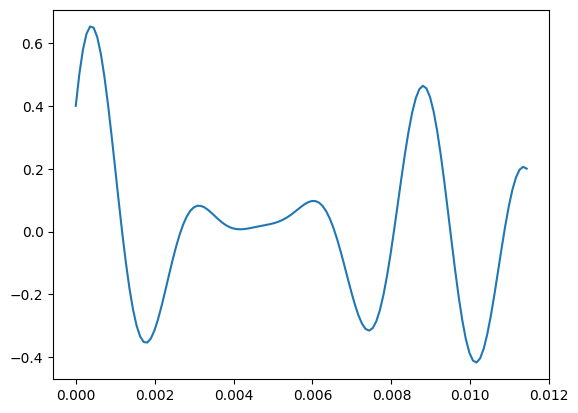

In [ ]:
sin_DO = SinSignal(freq=261,amp=0.2)
newSignal = my_signal + sin_DO
newSignal_wave = newSignal.make_wave(duration=1)
newSignal.plot()
newSignal_wave.make_audio()

Получилось более отчетливое звучание

Посмотрим спектр:

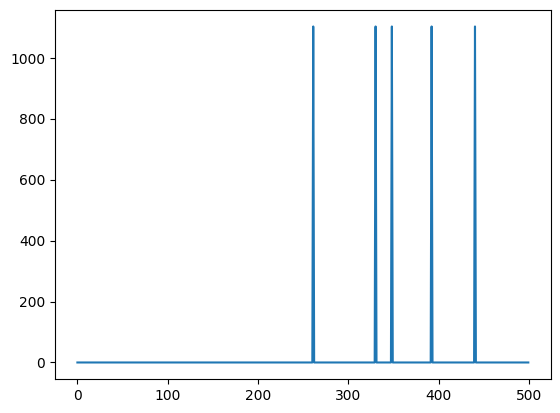

In [ ]:
spectrum = newSignal_wave.make_spectrum()
spectrum.plot(high = 500)

# Упражнение 1.4
Напишите функцию stretch, берущую wave и коэффициент изменения. Она должна ускорять или замедлять сигнал изменением ts и framerate. Подсказка: должно получиться всего 2 строки кода.

Получившаяся функция:

In [ ]:
def stretch(wave, factor):
  wave.ts *= factor
  wave.framerate /= factor

Проверим её на нашем первоначальном звуке. Для начала выведем сам звук и его спектрограмму:

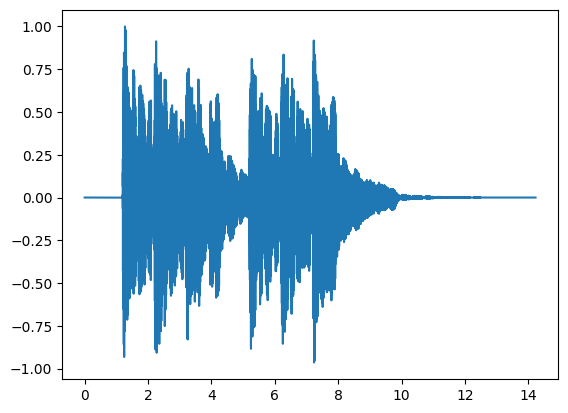

In [ ]:
wave = read_wave('sound_for_lab1.wav')
wave.plot()
wave.make_audio()

Теперь ускорим наш звук в 2 раза:

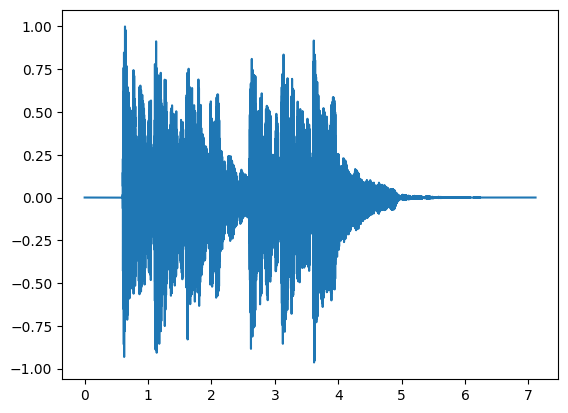

In [ ]:
stretch(wave, 0.5)
wave.plot()
wave.make_audio()

Теперь наоборот, замедлим в 2 раза:

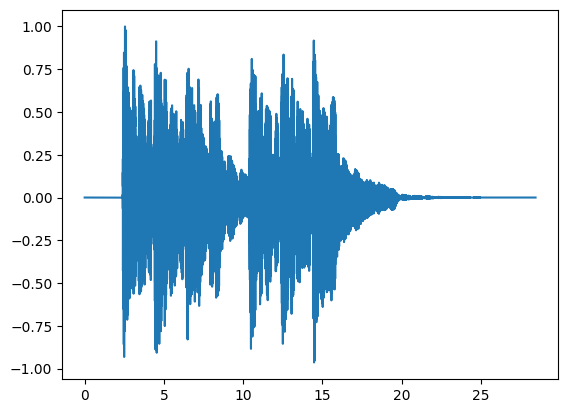

In [ ]:
stretch(wave, 2)
wave.plot()
wave.make_audio()